# Numerik Praktikum 6

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 2 (Optimierung)


In [5]:
# Bestimmen Sie mit dem Newton-Verfahren das Minimum der Funktion f(x) = tan(x) - exp(x) im Intervall [0.2, 1.2]

f_x = lambda x: np.tan(x) - np.exp(x)
f_x_d = lambda x: 1/np.cos(x)**2 - np.exp(x)
f_x_dd = lambda x: 2*np.sin(x)/np.cos(x)**3 - np.exp(x)

x = 1.2
tol = 10e-12
k = 0
res = abs(f_x_d(x))
while res > tol:
    x = x - f_x_d(x)/f_x_dd(x)
    res = abs(f_x_d(x))
    k=k+1
    print( x, res, k )

1.0802007406822376 1.5595674438102365 1
0.968178431984551 0.479565293251182 2
0.8934285716382231 0.10227903199678323 3
0.86711395823868 0.008612384012890661 4
0.8644636362699957 7.78954247269148e-05 5
0.8644392248180692 6.537169028320022e-09 6
0.8644392227690583 4.440892098500626e-16 7


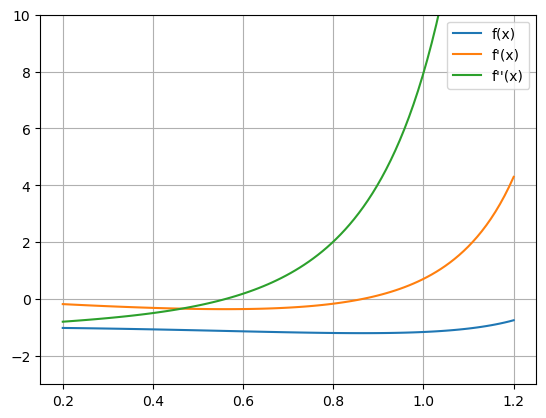

In [12]:
# plot the functions f(x), f'(x) and f''(x)
x = np.linspace(0.2, 1.2, 100)
y = f_x(x)
y_d = f_x_d(x)
y_dd = f_x_dd(x)

plt.plot(x, y, label='f(x)')
plt.plot(x, y_d, label="f'(x)")
plt.plot(x, y_dd, label="f''(x)")
plt.legend()
plt.grid()
plt.ylim(-3, 10)
plt.show()

# Aufgabe 3 (Mehrdimensionales Newton-Verfahren)

In [6]:
def newton(f, J, x0, tol=1.e-8):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

In [7]:
# Bestimmen Sie mit dem mehrdimensionalen Newton-Verfahren ausgehend vom Startpunkt (1, 1) die Näherungslösung des nichtlinearen Gleichungssystems

f = lambda x: np.array([-2*x[0]**3 + 3*x[1]**2 + 42, 5*x[0]**2 + 3*x[1]**3 - 69])
J = lambda x: np.array([[-6*x[0]**2, 6*x[1]], [10*x[0], 9*x[1]**2]])

print(newton(f, J, np.array([1, 1])))

(array([3., 2.]), 16)


# Aufgabe 4 (Mehrdimensionales Newton-Verfahren)

In [8]:
def newton(f, J, x0, tol=1.e-6):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

In [9]:
f = lambda x: np.array([x[0] * np.exp(x[1]) -1, x[1] - 1 - x[0]**2])
J = lambda x: np.array([[np.exp(x[1]), x[0]*np.exp(x[1])], [-2*x[0], 1]])
x0 = np.array([-1, -1])

print(newton(f, J, x0))

(array([0.32993569, 1.10885756]), 11)


# Aufgabe 7 (Mehrdimensionales Newton-Verfahren)

In [10]:
f = lambda x: np.array([x[0]**2 - x[1] - 1, (x[0] - 2)**2 + (x[1] - 0.5)**2 - 1])
J = lambda x: np.array([[2*x[0], -1], [2*x[0] - 4, 2*x[1] - 1]])

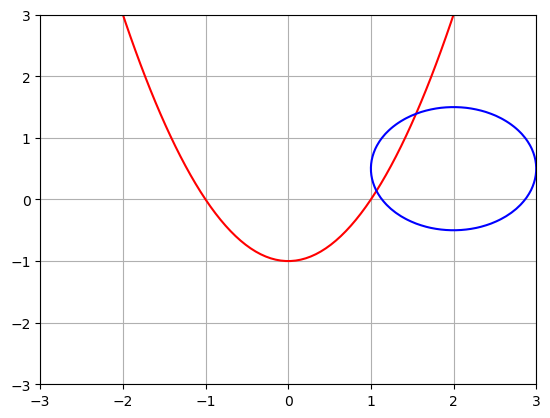

In [11]:
# zeichne einen contour plot der Funktion f(x)
x = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x, x)
Z = f([X, Y])

plt.contour(X, Y, Z[0], levels=[0], colors='r')
plt.contour(X, Y, Z[1], levels=[0], colors='b')
plt.grid()

plt.show()

In [12]:
def newton(f, J, x0, tol=1.e-4):
    max_loops = 1000
    x = x0
    k = 0
    res = np.linalg.norm(f(x))
    while res > tol and k < max_loops:
        k += 1
        d = np.linalg.solve(J(x), f(x))
        x = x - d
        res = np.linalg.norm(f(x))
    return x, k

In [13]:
x0 = np.array([1, 0])
print(newton(f, J, x0))

x1 = np.array([1.5, 1])
print(newton(f, J, x1))

(array([1.06734608, 0.13922765]), 3)
(array([1.54634304, 1.39117672]), 4)
